In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/home/jorge/tfm-jvm/data/data/data_7.csv")
target_classic = pd.read_csv("/home/jorge/tfm-jvm/data/data/target_classic.csv")
clusters = pd.read_csv("/home/jorge/tfm-jvm/data/data/clusters.csv")
data

,id_p,n_days,N_last,N_first,N_diff_positive,N_diff_negative,pop_sum_mean,pop_sum_std,pop_mean_mean,pop_mean_std,...,hunos,romanos_increase,germanos_increase,galos_increase,egipcios_increase,hunos_increase,rs_day_last,p_play,p_play_weekend,p_play_week
0,9,7,3,2,1.0,0.0,1013.714286,257.146336,370.380952,45.911621,...,0,0,0,1,0,0,16,0.857143,0.5,1.0
1,10,7,17,16,1.0,0.0,12741.428571,418.476944,762.258403,6.744138,...,0,1,0,0,0,0,137,1.000000,1.0,1.0
2,12,7,3,3,0.0,0.0,1611.857143,111.475601,537.285714,37.158534,...,3,0,0,0,0,0,16,1.000000,1.0,1.0
3,14,7,2,2,0.0,0.0,369.428571,5.563486,184.714286,2.781743,...,0,0,0,0,0,0,13,0.428571,0.5,0.4
4,19,7,1,1,0.0,0.0,214.285714,22.932613,214.285714,22.932613,...,0,0,0,0,0,0,30,0.714286,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117746,325241,7,1,1,0.0,0.0,372.285714,132.022365,372.285714,132.022365,...,0,0,0,0,0,0,16,0.571429,0.5,0.6
117747,325245,7,2,1,1.0,0.0,474.571429,114.277232,283.285714,36.341961,...,0,0,0,1,0,0,30,0.857143,1.0,0.8
117748,325246,7,1,1,0.0,0.0,205.142857,27.051978,205.142857,27.051978,...,0,0,0,0,0,0,35,1.000000,1.0,1.0
117749,325248,7,2,2,0.0,0.0,322.142857,34.681544,161.071429,17.340772,...,0,0,0,0,0,0,32,0.714286,0.0,1.0


In [3]:
X = data.merge(clusters, on="id_p")
X = X.merge(target_classic, on="id_p")
X

,id_p,n_days,N_last,N_first,N_diff_positive,N_diff_negative,pop_sum_mean,pop_sum_std,pop_mean_mean,pop_mean_std,...,germanos_increase,galos_increase,egipcios_increase,hunos_increase,rs_day_last,p_play,p_play_weekend,p_play_week,cluster,inactive
0,9,7,3,2,1.0,0.0,1013.714286,257.146336,370.380952,45.911621,...,0,1,0,0,16,0.857143,0.5,1.0,1,False
1,10,7,17,16,1.0,0.0,12741.428571,418.476944,762.258403,6.744138,...,0,0,0,0,137,1.000000,1.0,1.0,1,False
2,12,7,3,3,0.0,0.0,1611.857143,111.475601,537.285714,37.158534,...,0,0,0,0,16,1.000000,1.0,1.0,1,True
3,14,7,2,2,0.0,0.0,369.428571,5.563486,184.714286,2.781743,...,0,0,0,0,13,0.428571,0.5,0.4,1,True
4,19,7,1,1,0.0,0.0,214.285714,22.932613,214.285714,22.932613,...,0,0,0,0,30,0.714286,0.5,0.8,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117746,325241,7,1,1,0.0,0.0,372.285714,132.022365,372.285714,132.022365,...,0,0,0,0,16,0.571429,0.5,0.6,2,True
117747,325245,7,2,1,1.0,0.0,474.571429,114.277232,283.285714,36.341961,...,0,1,0,0,30,0.857143,1.0,0.8,2,False
117748,325246,7,1,1,0.0,0.0,205.142857,27.051978,205.142857,27.051978,...,0,0,0,0,35,1.000000,1.0,1.0,2,False
117749,325248,7,2,2,0.0,0.0,322.142857,34.681544,161.071429,17.340772,...,0,0,0,0,32,0.714286,0.0,1.0,2,False


In [4]:
del X["id_p"], X["n_days"]

## Split

In [5]:
y = X["inactive"]
del X["inactive"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Random Forest Classifier

In [7]:
clf = RandomForestClassifier(n_estimators=100, max_depth=None, criterion="gini", min_impurity_decrease=0, n_jobs=-1)

In [8]:
%%time
clf.fit(X_train, y_train)

CPU times: user 10.7 s, sys: 45.7 ms, total: 10.7 s
Wall time: 1.54 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [9]:
clf.score(X_test, y_test)

0.9678306950200422

In [10]:
y_pred = clf.predict(X_test)

## Results

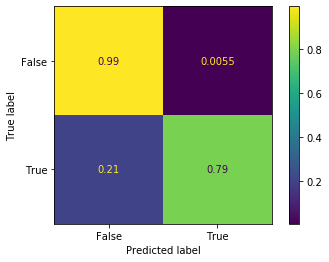

In [11]:
plot_confusion_matrix(clf, X_test, y_test, normalize="true")

In [18]:
cm = confusion_matrix(y_test, y_pred, normalize="true")

In [19]:
cm

array([[0.99507785, 0.00492215],
       [0.20692718, 0.79307282]])

In [13]:
pd.DataFrame({"features" : X.columns.to_list(), "importance" : clf.feature_importances_.tolist()}).sort_values(by="importance", ascending=False)

,features,importance
24,rs_day_last,0.294493
25,p_play,0.082856
12,g_mean_mean,0.065402
13,g_mean_std,0.063074
27,p_play_week,0.056798
11,g_sum_std,0.046827
8,norm2_mean_mean,0.046530
10,g_sum_mean,0.044889
26,p_play_weekend,0.038872
4,pop_sum_mean,0.038229


## Simulation

In [31]:
%%time
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s6 = []
s7 = []
s8 = []

for i in range(5,150):
    clf1 = RandomForestClassifier(n_estimators=i, max_depth=None, criterion="gini", min_impurity_decrease=0, n_jobs=-1)
    clf2 = RandomForestClassifier(n_estimators=i, max_depth=None, criterion="entropy", min_impurity_decrease=0, n_jobs=-1)
    clf3 = RandomForestClassifier(n_estimators=i, max_depth=10, criterion="gini", min_impurity_decrease=0, n_jobs=-1)
    clf4 = RandomForestClassifier(n_estimators=i, max_depth=10, criterion="entropy", min_impurity_decrease=0, n_jobs=-1)
    clf5 = RandomForestClassifier(n_estimators=i, max_depth=7, criterion="gini", min_impurity_decrease=0.01, n_jobs=-1)
    clf6 = RandomForestClassifier(n_estimators=i, max_depth=7, criterion="entropy", min_impurity_decrease=0.01, n_jobs=-1)
    clf7 = RandomForestClassifier(n_estimators=i, max_depth=3, criterion="gini", min_impurity_decrease=0, n_jobs=-1)
    clf8 = RandomForestClassifier(n_estimators=i, max_depth=3, criterion="entropy", min_impurity_decrease=0, n_jobs=-1)
    

    s1.append(clf1.fit(X_train, y_train).score(X_test, y_test))
    s2.append(clf2.fit(X_train, y_train).score(X_test, y_test))
    s3.append(clf3.fit(X_train, y_train).score(X_test, y_test))
    s4.append(clf4.fit(X_train, y_train).score(X_test, y_test))
    s5.append(clf5.fit(X_train, y_train).score(X_test, y_test))
    s6.append(clf6.fit(X_train, y_train).score(X_test, y_test))
    s7.append(clf7.fit(X_train, y_train).score(X_test, y_test))
    s8.append(clf8.fit(X_train, y_train).score(X_test, y_test))

CPU times: user 1h 49min 32s, sys: 24 s, total: 1h 49min 56s
Wall time: 19min 1s


In [32]:
rf_sim = pd.DataFrame({"s1":s1, "s2":s2, "s3":s3, "s4":s4, "s5":s5, "s6":s6, "s7":s7, "s8":s8})
rf_sim

,s1,s2,s3,s4,s5,s6,s7,s8
0,0.955517,0.957487,0.932706,0.921190,0.866125,0.866125,0.883382,0.884350
1,0.952663,0.955364,0.939415,0.930209,0.866125,0.866125,0.881293,0.885488
2,0.957164,0.957402,0.928749,0.928562,0.887204,0.866125,0.880257,0.884299
3,0.958659,0.957113,0.928443,0.925165,0.866125,0.866125,0.884095,0.893284
4,0.962260,0.962345,0.926931,0.922991,0.866125,0.866125,0.887509,0.886354
...,...,...,...,...,...,...,...,...
140,0.968323,0.968170,0.928290,0.926727,0.866125,0.866125,0.886847,0.885641
141,0.968068,0.968561,0.928188,0.925725,0.866125,0.866125,0.885692,0.885981
142,0.968527,0.968969,0.927814,0.925080,0.866125,0.866125,0.886117,0.886337
143,0.968051,0.968238,0.925538,0.925929,0.866125,0.866125,0.888732,0.888274


In [34]:
rf_sim.to_csv("/home/jorge/tfm-jvm/data/rf_simulations.csv", index=False)

In [38]:
#Matplotlibs defines
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


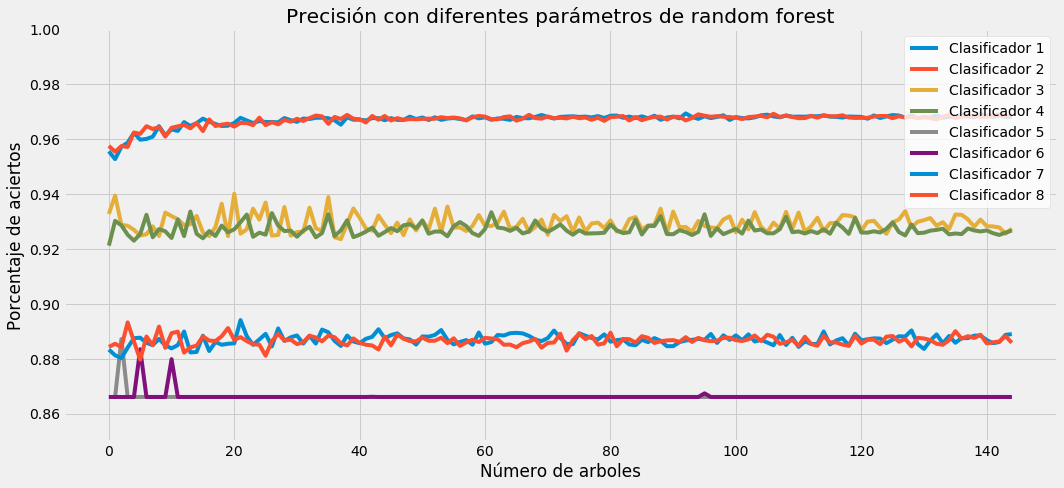

In [51]:
x = np.arange(len(range(5,150)))
width = 0.3 

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x, s1, label='Clasificador 1')
ax.plot(x, s2, label='Clasificador 2')
ax.plot(x, s3, label='Clasificador 3')
ax.plot(x, s4, label='Clasificador 4')
ax.plot(x, s5, label='Clasificador 5')
ax.plot(x, s6, label='Clasificador 6')
ax.plot(x, s7, label='Clasificador 7')
ax.plot(x, s8, label='Clasificador 8')


ax.set_title('Precisión con diferentes parámetros de random forest')
ax.set_ylim(bottom=0.85, top=1)
ax.set_ylabel("Porcentaje de aciertos")
ax.set_xlabel("Número de arboles")
legend = ax.legend(frameon=True)
legend.get_frame().set_facecolor((1, 1, 1))
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/random_forest_sim.eps")